$dt_s$ 是衛星上時間的微小變化量，$dt_E$ 是赤道上時間的微小變化量，$\frac{dt_s}{dt_E}是衛星上的時間與赤道上時間的變化比$。

$$\left(\frac{dt_s}{dt_E}\right)^2=\left(\frac{1-\frac{2M}{r_s}-v_s^2}{1-\frac{2M}{r_E}-v_E^2}\right)^2$$

衛星以等速率 $v$ 繞地球進行半徑為 $r$ 週期 $T$ 為半天的圓周運動，解出 $v$ 與 $r$。


$$v=\frac{2\pi r}{T}$$
$$\frac{GMm}{r^2}=\frac{mv^2}{r}$$

$$r=\frac{GM}{v^2}=\frac{Tv}{2\pi}$$

$$v^3=\frac{2\pi GM}{T}$$

In [1]:
import astropy.constants as const
import astropy.units as u
import numpy as np
v_E=const.R_earth*np.pi/43200/(1*u.s)/const.c
v_E2=v_E**2
G=const.G
def kg2m(M_kg):
    return G/const.c**2*M_kg
def sec2m(t_sec):
    return t_sec*const.c
M=kg2m(const.M_earth)
print("M =",M)
print("v_E square =",v_E2)
r_E=const.R_earth
print("2M/r_E =",2*M/r_E)
T=43200*u.s
v_s3=2*np.pi*G*const.M_earth/T
v_s=(v_s3**(1/3)/const.c)
v_s2=v_s**2
print("v_s square =",v_s2)
r_s=v_s*sec2m(T)/2/np.pi
print("2M/r_s =",2*M/r_s)


M = 0.004435027574029947 m
v_E square = 2.3937208030747504e-12
2M/r_E = 1.3907049353349578e-09
v_s square = 1.6666631322508726e-10
2M/r_s = 3.3333262645017493e-10


$v_E=r_E \frac{d\phi}{dt}\approx r_E \frac{d\phi}{dt_E}$
$$v_E^2\approx 2.3937208030747504e-12$$
$$v_s^2\approx 1.6666631322508726e-10$$
$$2M/r_E = 1.3907049353349578e-09$$
$$2M/r_s = 3.3333262645017493e-10$$

$$\begin{array}{rcl}\frac{dt_s}{dt_E}&=&\frac{\left(1-\frac{2M}{r_s}-v_s^2\right)^{1/2}}{\left(1-\frac{2M}{r_E}-v_E^2\right)^{1/2}}
=\left(1-\frac{2M}{r_s}-v_s^2\right)^{1/2}\left(1-\frac{2M}{r_E}-v_E^2\right)^{-1/2}=\left(1+\frac{1}{2}(-\frac{2M}{r_s}-v_s^2)\right)\left(1+\frac{-1}{2}(-\frac{2M}{r_E}-v_E^2)\right)\\
&\approx &1-\frac{M}{r_s}-\frac{v_s^2}{2}+\frac{M}{r_E}+\frac{v_E^2}{2}\end{array}$$


In [2]:
print("不考慮衛星及地球自轉的速度，地面一天的時間，衛星時間快了約",(-M/r_s+M/r_E)*(86400*u.s))

不考慮衛星及地球自轉的速度，地面一天的時間，衛星時間快了約 4.567848374382262e-05 s


In [3]:
print("考慮衛星及地球自轉的速度之後，地面一天的時間，衛星時間快了約",(-M/r_s-v_s2/2+M/r_E+v_E2/2)*(86400*u.s))
print("這一點點的時間差，衛星移動了",(-M/r_s-v_s2/2+M/r_E+v_E2/2)*(86400*u.s)*v_s*const.c)

考慮衛星及地球自轉的速度之後，地面一天的時間，衛星時間快了約 3.858190775119168e-05 s
這一點點的時間差，衛星移動了 0.14932355319916338 m


3.858190775119168e-05 s 相當於 38582 奈秒

In [4]:
print(v_E*const.c,v_s*const.c)

463.82852092270974 m / s 3870.2998867273805 m / s


上面的計算是赤道地區，雖然，不同的緯度有不同的 $r_E, v_E$，然而緯度較高地區 $r_E$ 較小，$2M/r_E$ 較大，同時 $v_E^2/2$ 較小，互相抵消的結果，請看下圖。

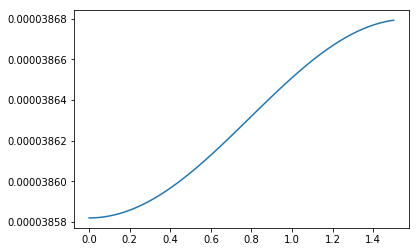

<Quantity 3.858190775119168e-05>

In [17]:
theta=np.linspace(0,1.5,100)
import matplotlib.pyplot as plt
b=6356.8*u.km
def distance(t):
    return ((r_E*np.cos(t))**2+(b*np.sin(t))**2)**0.5
plt.plot(theta,[(-M/r_s-v_s2/2+M/distance(t)+v_E2*np.cos(t)**2/2)*(86400*u.s).value for t in theta])
plt.show()
(-M/r_s-v_s2/2+M/r_E+v_E2/2)*(86400*u.s).value